In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../../data/demographics/'
ca = pd.read_csv(path + 'CA_State_Labor.csv')
fl = pd.read_csv(path + 'FL_State_Labor.csv')
ga = pd.read_csv(path + 'GA_State_Labor.csv')
ny = pd.read_csv(path + 'NY_State_Labor.csv')

In [3]:
labor = [ca,fl,ga,ny]

## Available Data

In [4]:
for df in labor:
    print(df.iloc[0]['state'])
    print(df['month'].nunique(), 'months of labor data')

California
9 months of labor data
Florida
9 months of labor data
Georgia
9 months of labor data
NewYork
9 months of labor data


Have 9 months worth of labor data (Jan-Sept).
October labor data isn't set to come out until November 20th unfortunately

## Unemployment Rate

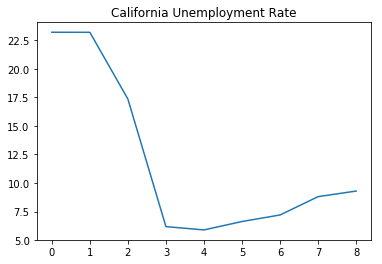

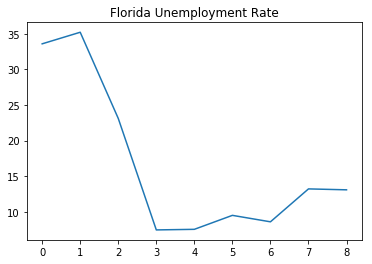

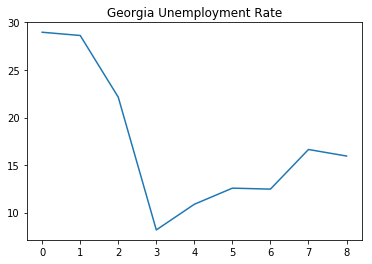

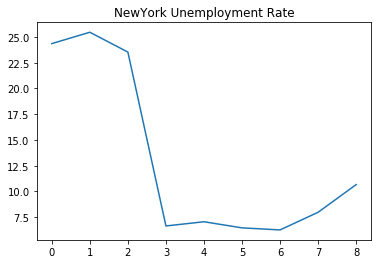

In [5]:
for df in labor:
    plt.plot(df['unemploymentRate'])
    plt.title(df.iloc[0]['state'] + ' Unemployment Rate')
    plt.show()

Curiously, unemployment rate has dropped since the beginning of the year, and bottomed out in March during the onset of COVID, but has steadily rised in each state since.

## Labor Force

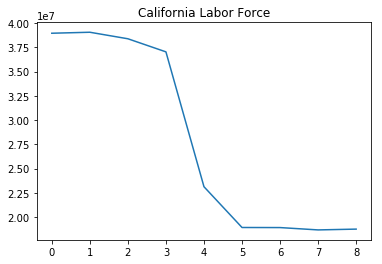

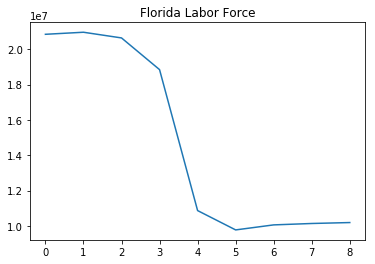

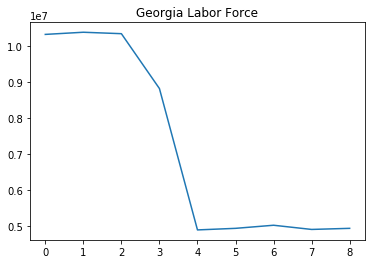

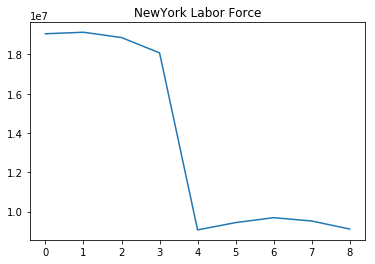

In [6]:
#fig, axs = plt.subplots(1,4)
for df in labor:
    plt.plot(df['laborForce'])
    plt.title(df.iloc[0]['state'] + ' Labor Force')
    plt.show()

Labor force has also steeply dropped since the onset of COVID, which explains the extraordinarily low unemployment rates.  So according to how BLS defines labor force, either millions of people are no longer present (died, moved, etc.), or are not actively looking for work (almost certainly the cause). 

In [7]:
case_path = '../../data/cases/'
ca_cases = pd.read_csv(case_path + 'CA_JHU_cases.csv')
fl_cases = pd.read_csv(case_path + 'FL_JHU_cases.csv')
ga_cases = pd.read_csv(case_path + 'GA_JHU_cases.csv')
ny_cases = pd.read_csv(case_path + 'NY_JHU_cases.csv')
cases = [ca_cases, fl_cases, ga_cases, ny_cases]

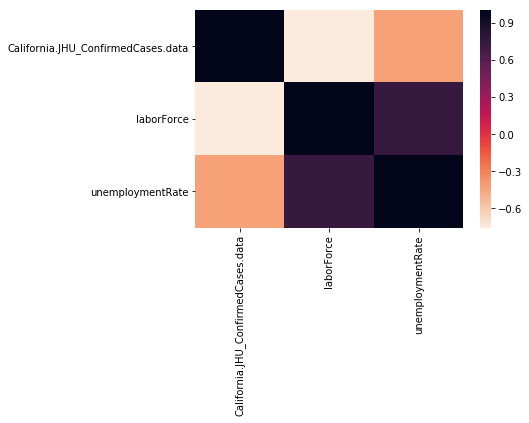

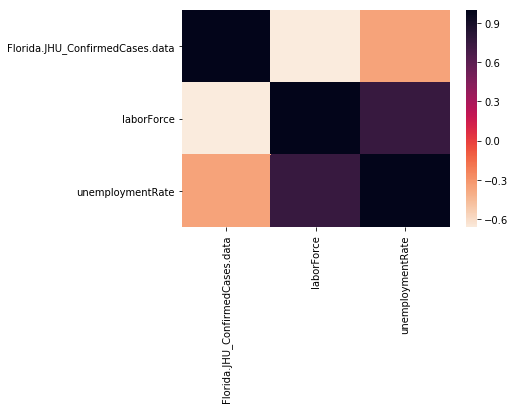

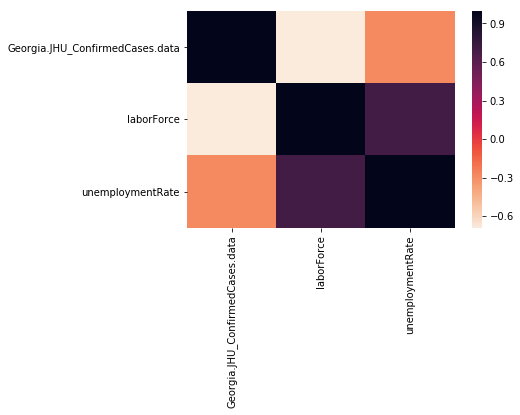

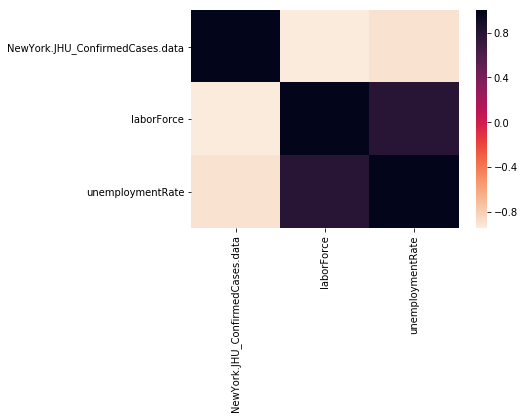

In [12]:
for i in range(len(cases)):
    df = cases[i].copy()
    state = list(df.columns)[1].split('.')[0]
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].apply(lambda x: int(x.month))
    df2 = labor[i].copy()
    rst = df[['date', 'month',state+'.JHU_ConfirmedCases.data']].merge(
        df2[['month','laborForce', 'unemploymentRate']], on=['month'])
    sns.heatmap(rst[[state+'.JHU_ConfirmedCases.data', 'laborForce', 'unemploymentRate']].corr(), cmap = sns.cm.rocket_r)
    plt.show()

Alright so some notes to end:
1. Labor data only exists up to September.  October data won't be out until after the due date.  What we do for the month of October/part of November is then an interesting subproblem.
2. Research has shown that the decline in labor force participation is a result of COVID (or as close to causality as they can say).  Additionally, women and minoritiy labor force participation rates have been hurt the most
- https://www.pewresearch.org/fact-tank/2020/10/22/fewer-mothers-and-fathers-in-u-s-are-working-due-to-covid-19-downturn-those-at-work-have-cut-hours/
- https://www.wbur.org/bostonomix/2020/10/09/massachusetts-shrinking-workforce-pandemic
- https://www.pewresearch.org/fact-tank/2020/06/11/unemployment-rose-higher-in-three-months-of-covid-19-than-it-did-in-two-years-of-the-great-recession/#:~:text=Unemployment%20rose%20higher%20in%20three,years%20of%20the%20Great%20Recession&text=The%20COVID%2D19%20outbreak%20and,20.5%20million%20in%20May%202020.
- https://www.cbsnews.com/news/unemployment-running-out-millions-americans/
- https://www.epi.org/publication/black-workers-covid/